# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('/kaggle/input/waze-dataset-1/waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?


1. the dataset is structured. each record is a user using Waze
2. YES. 700 rows in the 'label' column is missing

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







* label is the dependendent / target variable. Apart from ID all other features are applicable to solve the problem at stake. All features needs to be investigated to determine its importance.
* ID can be removed after checking for duplicates
* we can use isnull() isna() methods to create a boolean mask and determine missing (NULL/NA) data 
* median + or - IQR will provide the upper and lower thresholds for outliers. Any point outside the threshold can be examined and decided whether if those outliers are natural or are a product of errors

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [3]:
### YOUR CODE HERE ###
# viewing the first 5 rows
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
### YOUR CODE HERE ###

# size of the df (rows multiplies by columns)
df.size

194987

Generate summary statistics using the `describe()` method.

In [5]:
### YOUR CODE HERE ###

# summary stats of the df
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [6]:
### YOUR CODE HERE ###

# information about each column of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

1) What are some ways to identify outliers?
* visualize the distributions using boxplot or histograms
* calculate mean and median to observe the skewness using central tendencies
* use Q1 or Q3 + or - 1.5 IQR to determine outlier thresholds. anything data point which falls outside the thresholds are  outliers


2) How do you make the decision to keep or exclude outliers from any future models?  
* determine the nature and type of the outlier --> Global, contextual or collective
* if global --> remove the outlier records
* if contextual --> find if it can filled in (imputed or extrapolated)
* if collective --> find the nature of the cause, if it is not a derivative of an error in the data collection pipeline leave it



### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



To understand more about the data, its distributions needs to be examined
* boxplot --> to get a general understanding of the distribution, skew, outliers 
* histogram --> to visualize distribution and skewness 

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

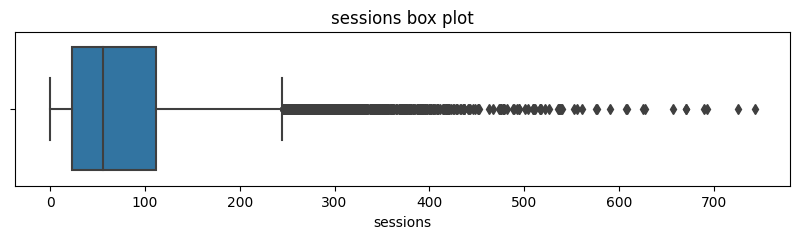

In [7]:
# Box plot
### YOUR CODE HERE ###

# set the plot size
plt.figure(figsize=(10,2))

# construct the boxplot
sns.boxplot(data=df, x='sessions')

# set the title
plt.title('sessions box plot')

# display the plot
plt.show()

mean: 80.633775585039
median: 56.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


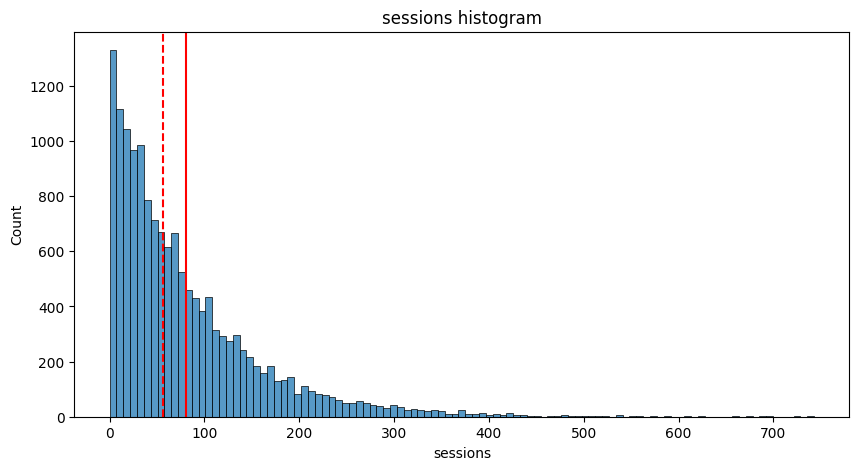

In [8]:
# Histogram
### YOUR CODE HERE ###

# print
print('mean:', df['sessions'].mean())
print('median:', df['sessions'].median())

# set the plot size
plt.figure(figsize=(10,5))

# construct the boxplot
sns.histplot(data=df, x='sessions')

# plot mean and median
plt.axvline(df['sessions'].mean(), color='red', linestyle='-')
plt.axvline(df['sessions'].median(), color='red', linestyle='--')

# title the plot
plt.title('sessions histogram')

# view
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

In [9]:
# Box plot
### YOUR CODE HERE ###

def plot_sns_boxplot(df, col_name_str):
    
    # set the plot size
    plt.figure(figsize=(10,2))

    # construct the boxplot
    sns.boxplot(data=df, x=col_name_str)

    # set the title
    plt.title(f'{col_name_str} box plot')

    # display the plot
    plt.show()

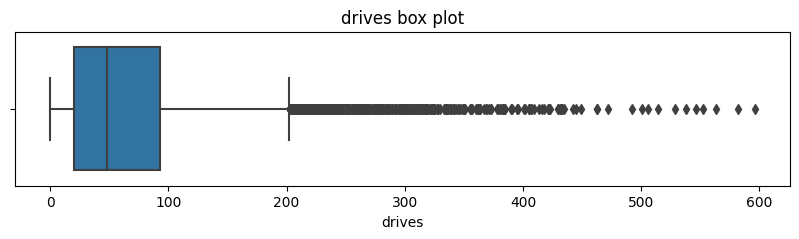

In [10]:
# Box plot
### YOUR CODE HERE ###

# use the custom boxplot function
plot_sns_boxplot(df, 'drives')

In [11]:
# Histogram
### YOUR CODE HERE ###


def plot_sns_histplot(df, col_name_str, bins=100, **kwargs):
    
    # print
    print('mean:', df[col_name_str].mean())
    print('median:', df[col_name_str].median())
    
    # set the plot size
    plt.figure(figsize=(10,5))

    # construct the boxplot
    sns.histplot(data=df, x=col_name_str, bins=bins)

    # plot mean and median
    plt.axvline(df[col_name_str].mean(), color='red', linestyle='-')
    plt.axvline(df[col_name_str].median(), color='red', linestyle='--')

    # title the plot
    plt.title(f'{col_name_str} histogram')

    # view
    plt.show()
    
    

mean: 67.28115207680511
median: 48.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


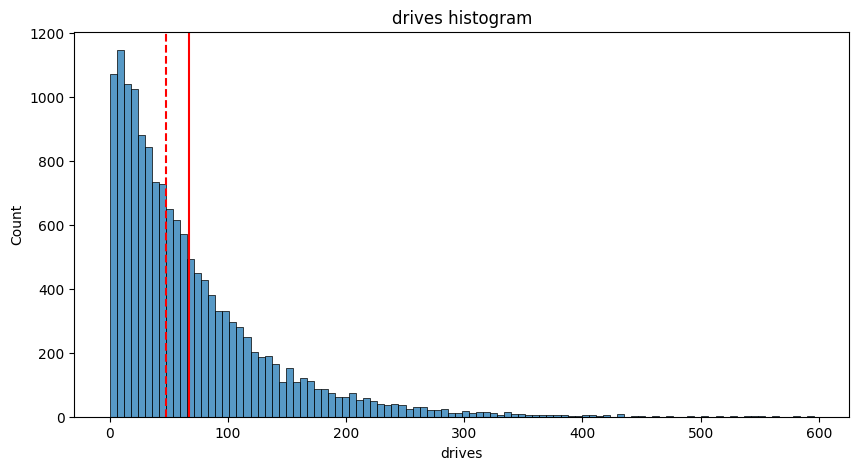

In [12]:
# Histogram
### YOUR CODE HERE ###

# use the custom histplot fn
plot_sns_histplot(df, 'drives')

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

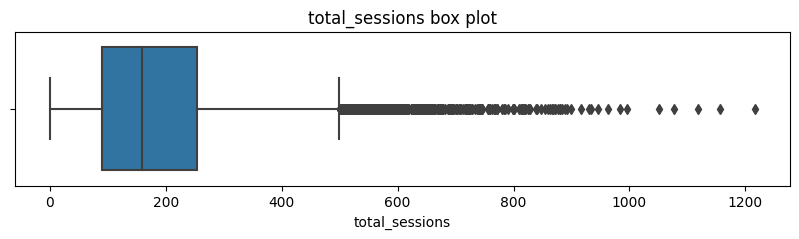

In [13]:
# Box plot
### YOUR CODE HERE ###

plot_sns_boxplot(df, 'total_sessions')

mean: 189.96444682404677
median: 159.5681147


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


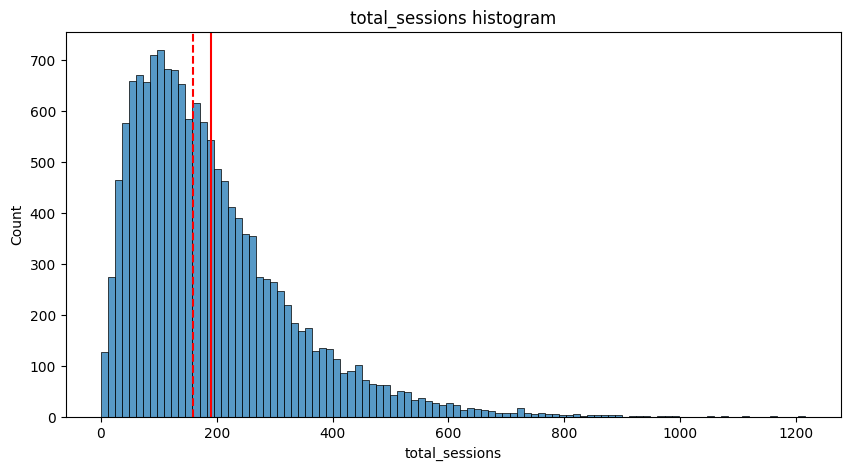

In [14]:
# Histogram
### YOUR CODE HERE ###

plot_sns_histplot(df, 'total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

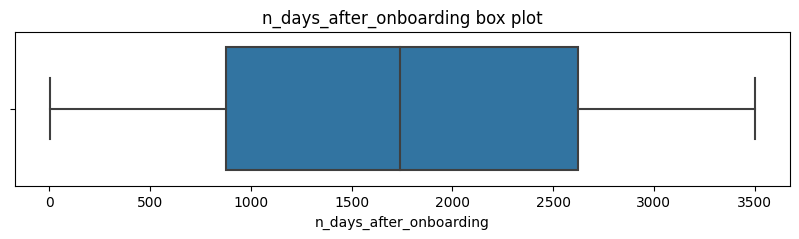

In [15]:
# Box plot
### YOUR CODE HERE ###

plot_sns_boxplot(df, 'n_days_after_onboarding')

mean: 1749.8377891859457
median: 1741.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


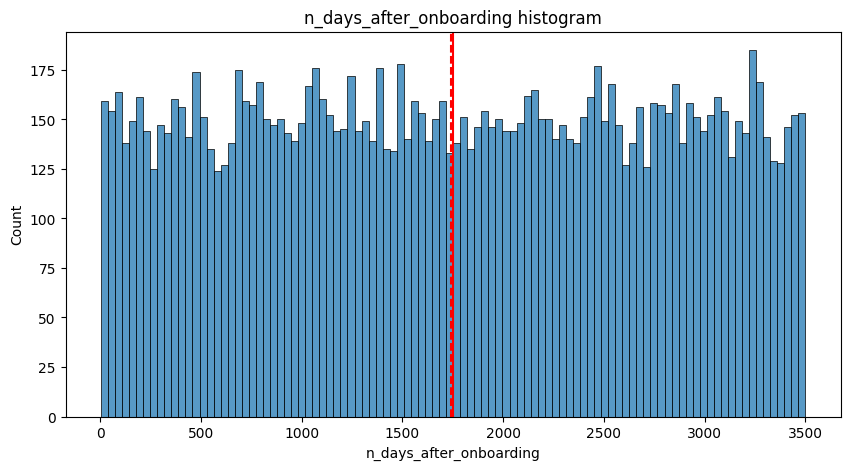

In [16]:
# Histogram
### YOUR CODE HERE ###

plot_sns_histplot(df, 'n_days_after_onboarding')

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

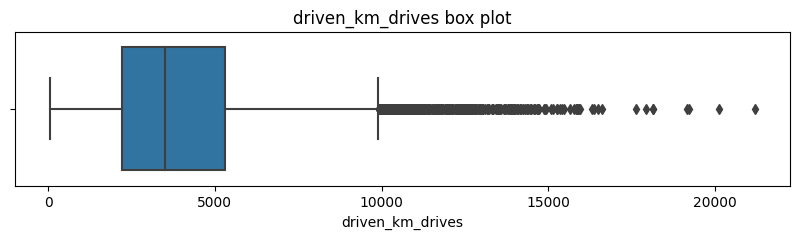

In [17]:
# Box plot
### YOUR CODE HERE ###

plot_sns_boxplot(df, 'driven_km_drives')

mean: 4039.3409208164917
median: 3493.858085


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


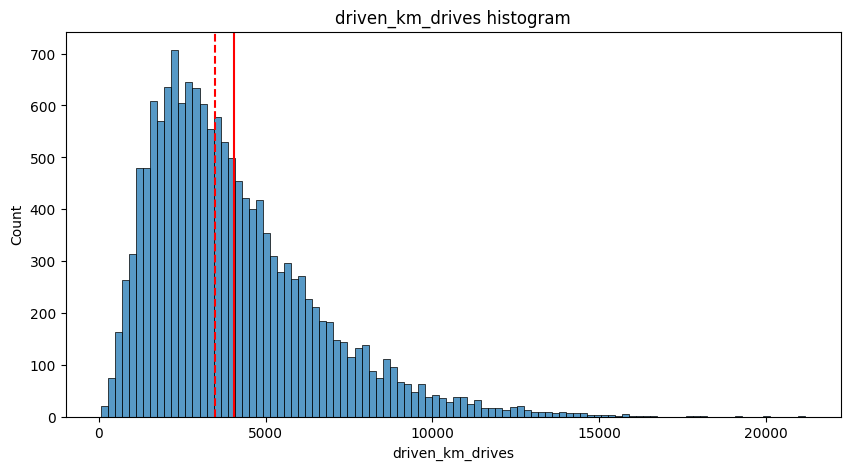

In [18]:
# Histogram
### YOUR CODE HERE ###

plot_sns_histplot(df, 'driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

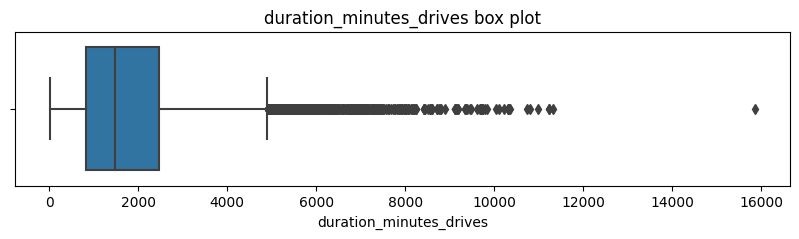

In [19]:
# Box plot
### YOUR CODE HERE ###

plot_sns_boxplot(df, 'duration_minutes_drives')

mean: 1860.976012129396
median: 1478.249859


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


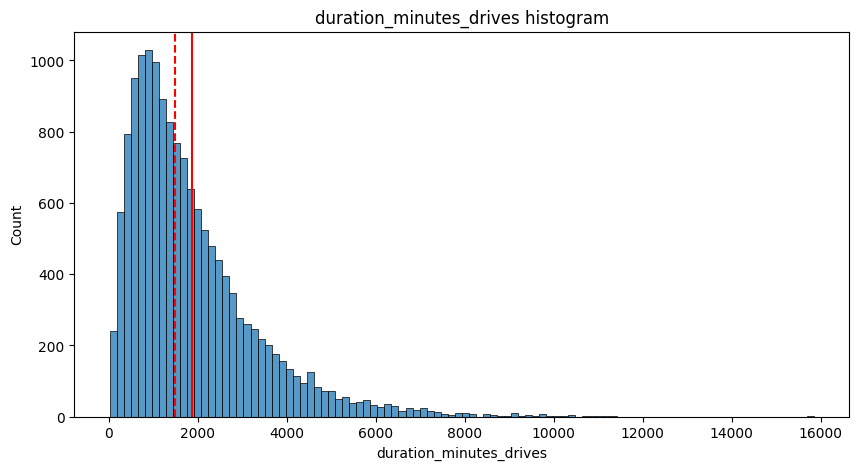

In [20]:
# Histogram
### YOUR CODE HERE ###

plot_sns_histplot(df, 'duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

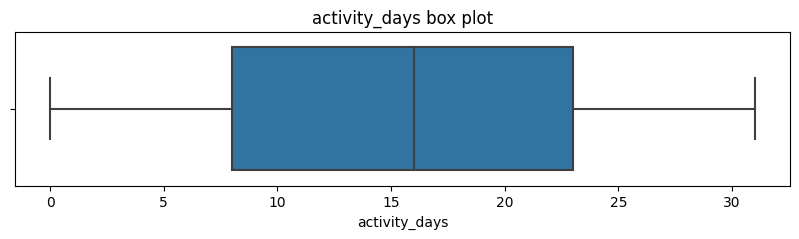

In [21]:
# Box plot
### YOUR CODE HERE ###

plot_sns_boxplot(df, 'activity_days')

mean: 15.537102473498233
median: 16.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


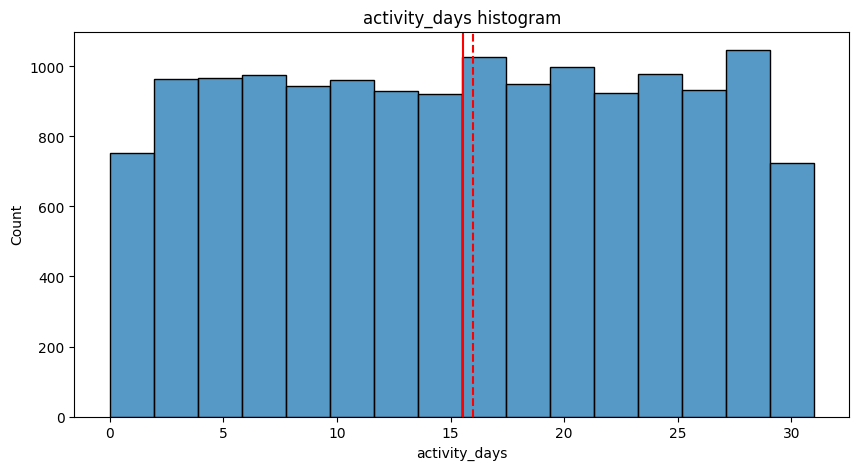

In [22]:
# Histogram
### YOUR CODE HERE ###

plot_sns_histplot(df, 'activity_days',bins=16, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

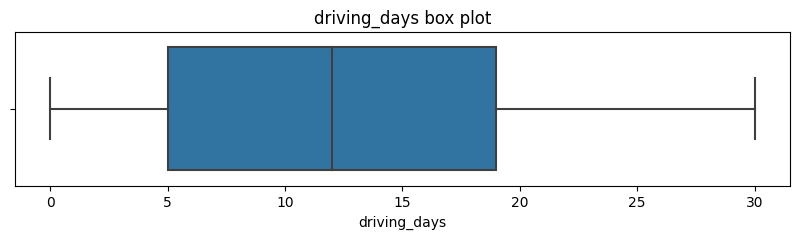

In [23]:
# Box plot
### YOUR CODE HERE ###

plot_sns_boxplot(df, 'driving_days')

mean: 12.179878658577238
median: 12.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


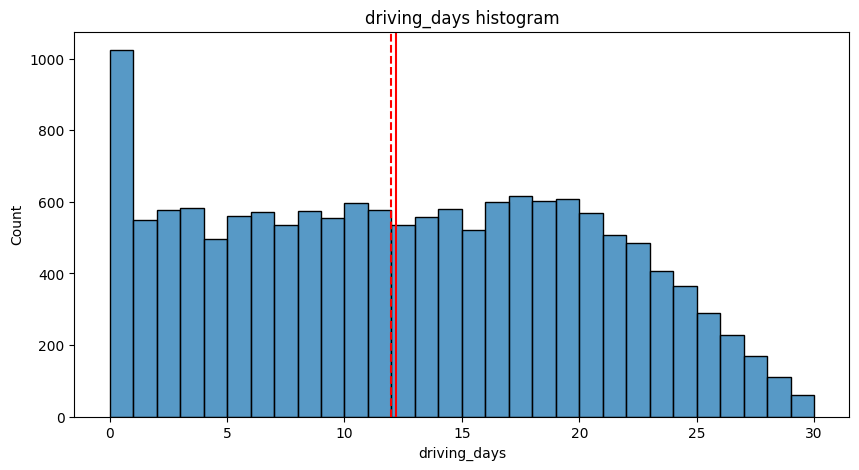

In [24]:
# Histogram
### YOUR CODE HERE ###

plot_sns_histplot(df, 'driving_days', bins=30, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

Text(0.5, 1.0, 'Users by device')

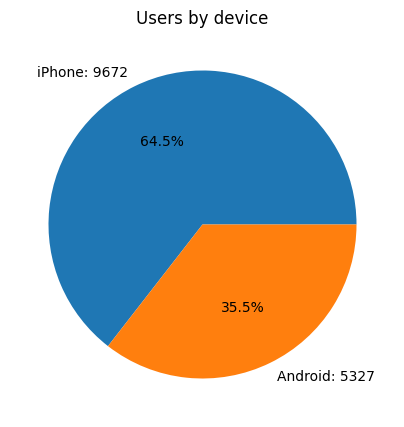

In [25]:
# Pie chart
### YOUR CODE HERE ###

# specify a chart size
plt.figure(figsize=(5,5))

# constructing pie chart
plt.pie(x=df['device'].value_counts(),
        labels=[f"{df['device'].value_counts().index[0]}: {df['device'].value_counts().values[0]}",
                f"{df['device'].value_counts().index[1]}: {df['device'].value_counts().values[1]}"],
        autopct='%1.1f%%')

# set a title
plt.title('Users by device')

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

Text(0.5, 1.0, 'Count of retained vs. churned')

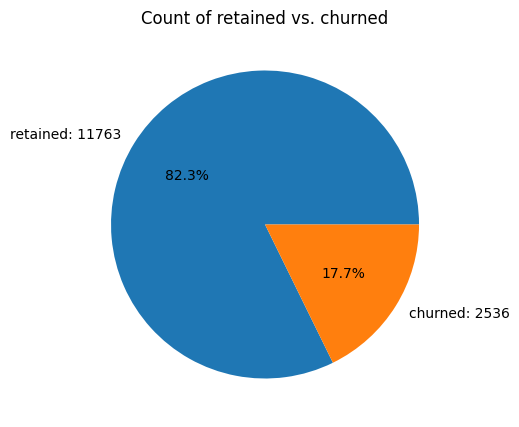

In [26]:
# Pie chart
### YOUR CODE HERE ###

# specify a chart size
plt.figure(figsize=(5,5))

# constructing pie chart
plt.pie(x=df['label'].value_counts(),
        labels=[f"{df['label'].value_counts().index[0]}: {df['label'].value_counts().values[0]}",
                f"{df['label'].value_counts().index[1]}: {df['label'].value_counts().values[1]}"],
        autopct='%1.1f%%')

# set a title
plt.title('Count of retained vs. churned')

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

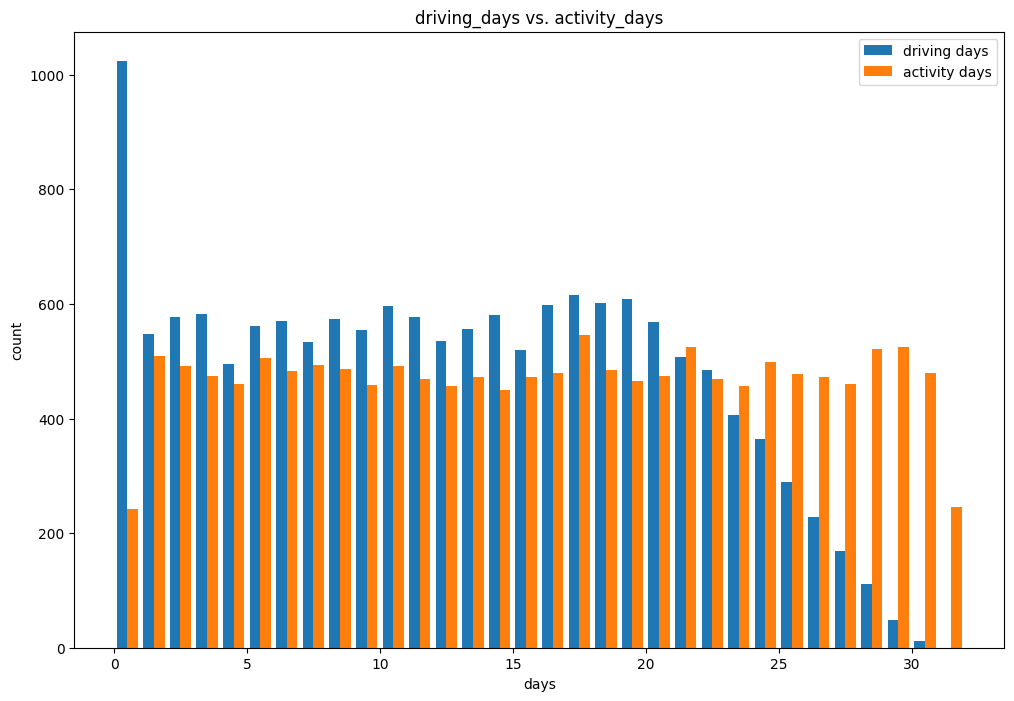

In [27]:
# Histogram
### YOUR CODE HERE ###

# set a plot size
plt.figure(figsize=(12,8))

# legend labels
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=['driving days', 'activity days'])

# setting x and y labels
plt.xlabel('days')
plt.ylabel('count')

# creating a legend
plt.legend()

# set a title
plt.title('driving_days vs. activity_days')

# show
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [28]:
### YOUR CODE HERE ###
print('Max driving days:',df['driving_days'].max())
print('Max activity days:',df['activity_days'].max())

Max driving days: 30
Max activity days: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

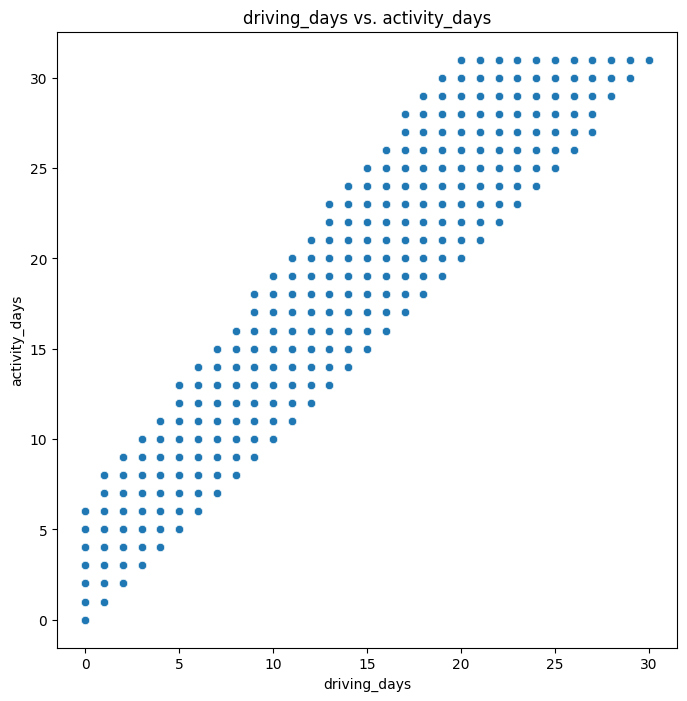

In [29]:
# Scatter plot
### YOUR CODE HERE ###

# set the plot size
plt.figure(figsize=(8,8))

# create a scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')

# create a title for the plot
plt.title('driving_days vs. activity_days')

# show the plot
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Retention by device histogram')

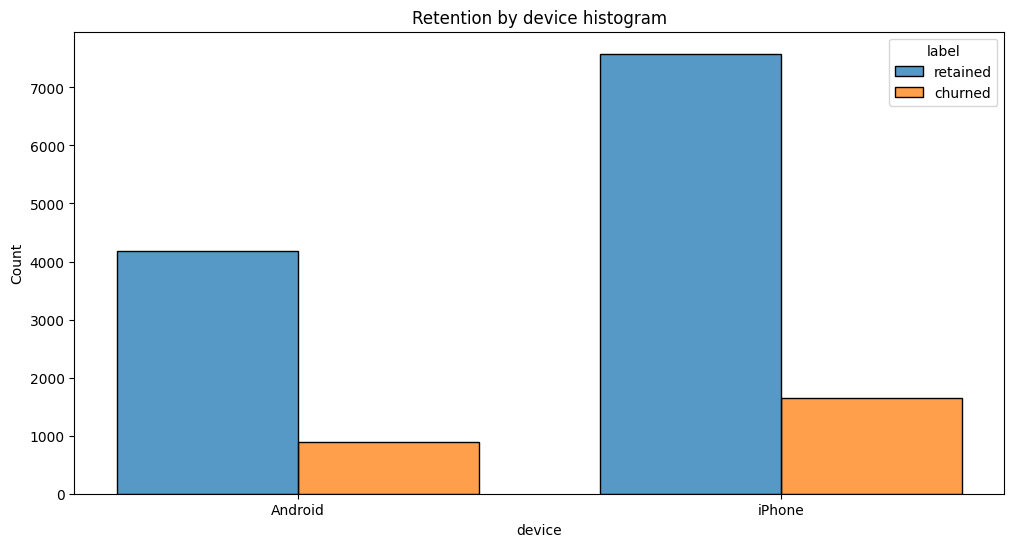

In [30]:
# Histogram
### YOUR CODE HERE ###

# set a plot size
plt.figure(figsize=(12,6))

# construct the histogram plot
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.75)

# create a plot title
plt.title('Retention by device histogram')

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven per driving day last month for users who churned was 697.54 km, versus 289.55 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [31]:
# 1. Create `km_per_driving_day` column
### YOUR CODE HERE ###

df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']


# 2. Call `describe()` on the new column
### YOUR CODE HERE ###

df['km_per_driving_day'].describe()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [32]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###

df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0


# 2. Confirm that it worked
### YOUR CODE HERE ###

df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

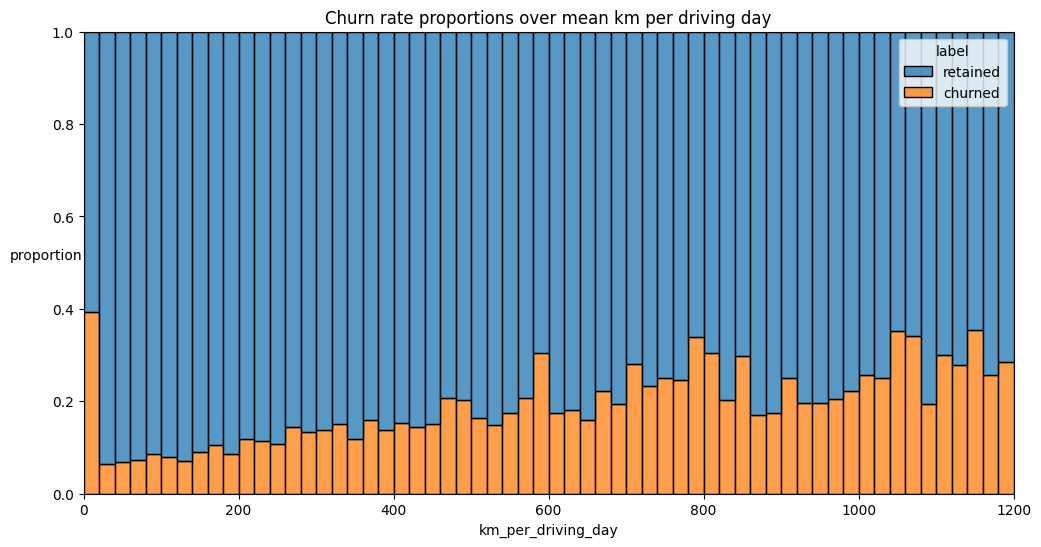

In [33]:
# Histogram
### YOUR CODE HERE ###


# set plot size
plt.figure(figsize=(12,6))

# construct the histogram
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')

# set y label
plt.ylabel('proportion', rotation=0)

# set plot title
plt.title('Churn rate proportions over mean km per driving day')

# show the plot
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

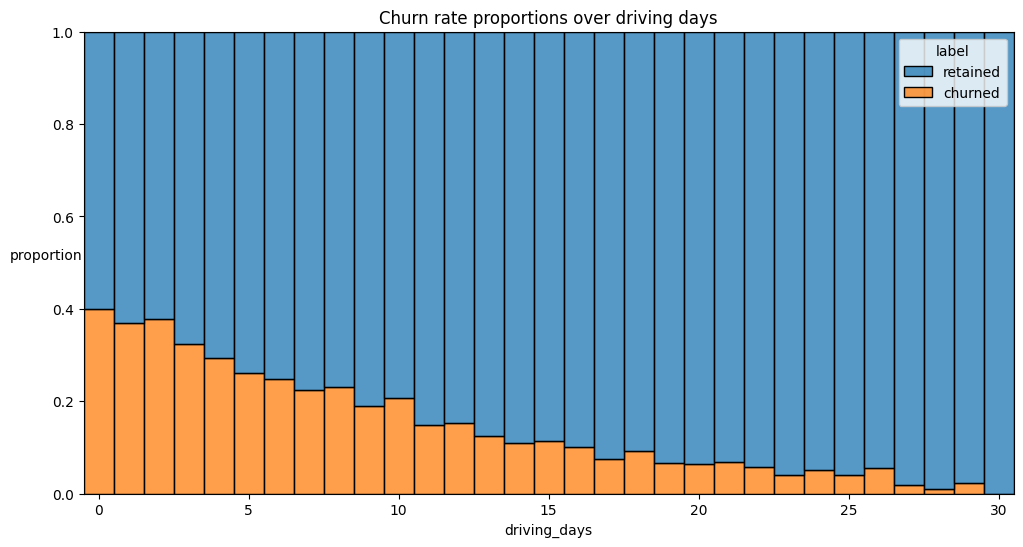

In [34]:
# Histogram
### YOUR CODE HERE ###

# set plot size
plt.figure(figsize=(12,6))

# construct the histogram
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)

# set y label
plt.ylabel('proportion', rotation=0)

# set plot title
plt.title('Churn rate proportions over driving days')

# show the plot
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [35]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions'] *100

What is the median value of the new column?

In [36]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'].median()

42.30970299276318

Now, create a histogram depicting the distribution of values in this new column.

mean: 44.92553378171563
median: 42.30970299276318


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

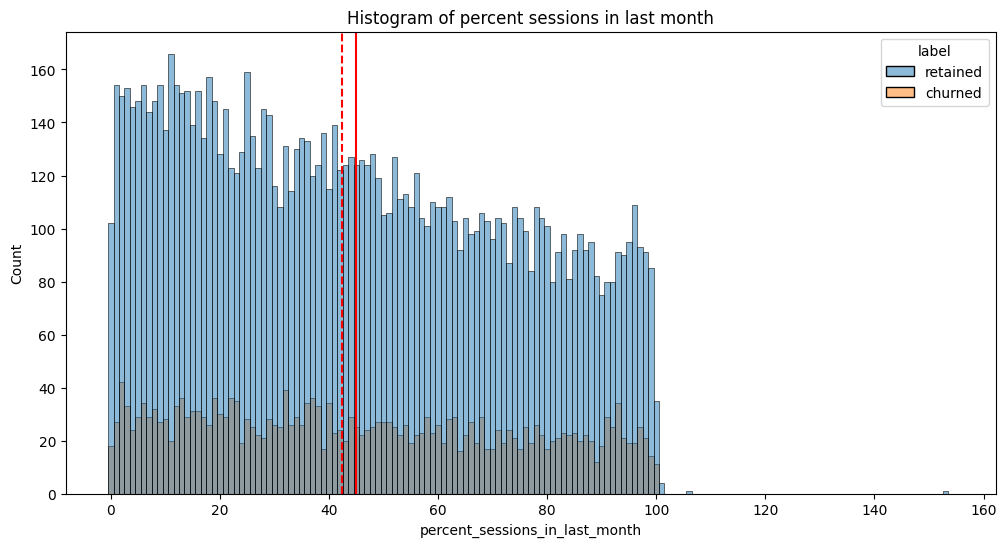

In [37]:
# Histogram
### YOUR CODE HERE ###

# set plot size
plt.figure(figsize=(12,6))

# printing mean and media
print('mean:', df['percent_sessions_in_last_month'].mean())
print('median:', df['percent_sessions_in_last_month'].median())

# construct the histogram
sns.histplot(data=df,
             x='percent_sessions_in_last_month',
             hue='label',
             multiple='layer',
             discrete=True)

# set plot title
plt.title('Histogram of percent sessions in last month')


# plot mean and median
plt.axvline(df['percent_sessions_in_last_month'].mean(), color='red', linestyle='-')
plt.axvline(df['percent_sessions_in_last_month'].median(), color='red', linestyle='--')

# show the plot
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [38]:
### YOUR CODE HERE ###
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


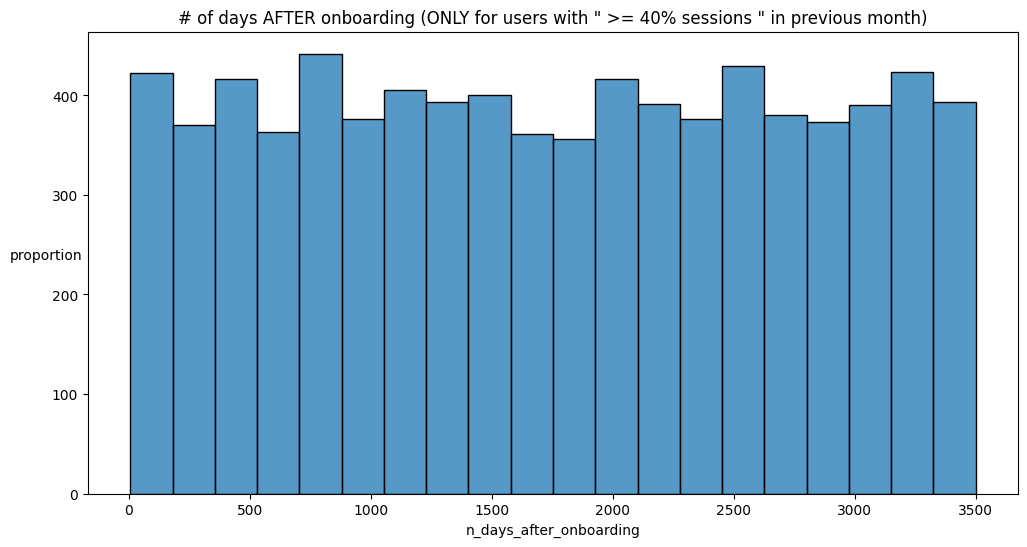

In [39]:
# Histogram
### YOUR CODE HERE ###

# set plot size
plt.figure(figsize=(12,6))

# construct the histogram
sns.histplot(data=df[df['percent_sessions_in_last_month'] >= 40],
             x='n_days_after_onboarding')

# set y label
plt.ylabel('proportion', rotation=0)

# set plot title
plt.title('# of days AFTER onboarding (ONLY for users with " >= 40% sessions " in previous month)')

# show the plot
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [40]:
### YOUR CODE HERE ###

# function to replace the outliers with a particular percentile values
def outlier_imputer(column_name, percentile):
    
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    
    # fill in the values 
    df.loc[df[column_name] > threshold, column_name] = threshold
    
    # printing hte values of the percentiles replaced
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [41]:
### YOUR CODE HERE ###
col_list = ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']



for col in col_list:
    
    # printing the replaced outliers --> threshold
    outlier_imputer(col, 0.95)


                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Call `describe()` to see if your change worked.

In [42]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,44.925534
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,28.691863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,19.622145
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,42.309703
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,68.721626
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,153.063707


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?




I have learned ....

* n_days_after_onboarding, activity_days are uniformally distributed
* sessions, drives, total_sessions, driven_km_drives, duration_minutes_drives have distributions with right skew
* about ~65% of the users in the sample use iphone
* almost ~82% of the users in the sample are retained
* almost all distributions are skewed to the right
* the target column has null values, since target column cannot be directly imputed neither can it be dropped because of the value of sample size, further exploration is needed
* outliers have been imputed, need to re-examine if the changes made will influence the models about to be built. If it takes us haywire, we need to reassess the way to handle the outliers based on each variable

My other questions are ....
* ask the data engineer or the data source, how the nulls in the label column come up?
* retained users all have fewer drives than churned users, is this a sampling observation or it represents the population's behavior?
* contextual (qualitative) information about the sample dataset?


My client would likely want to know ...
* any interventions or promos that can be offered targeted to users who are about to be churned?
* improvements in observing the reasons behind user churn in contextual factors (we only have android and iphone here)



Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

In [43]:
### YOUR CODE HERE ###

# monthly km drives per session
df['monthly_km_per_session'] = (df['driven_km_drives']/(df['sessions']))

In [44]:
### YOUR CODE HERE ###
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_km_per_session
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,95.367025,10.818292
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,40.685648,66.840558
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,84.118609,26.834639
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.496767,18.644717
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,49.926590,47.026214


### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1) What types of distributions did you notice in the variables? What did this tell you about the data?
* right skewed distributions and uniform distributions
* there are naturally many variables that has a right skew because it indicates that there are many people who use Waze for a short time and only a handful few use it for longer periods that directly increases these metrics. 
* Also, most of the variables(features) that have a right skew have ONLY positive values

2) Was there anything that led you to believe the data was erroneous or problematic in any way?
* there were few variables (driven_km_drives and the variables which recorded days) that had unreasonable outliers. 
* Outliers of numerical continuous variables were imputed with 95th percentile values was used. Discrete variables could be imputed with with the max possible value it could get. But, this needs to be done after consulting with the data owner.


3) Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?
* there are many questions regarding the sample and the data collection mechanisms. those needs to be clarified after discussing with the data owner as well as the SME (product owner/product analyst).


4) What percentage of users churned and what percentage were retained?
* in the sample given, almost ~82% of the users are retained and ~18% churned  


5) What factors correlated with user churn? How?
* distance driven (mean km) per day, number of driving days were positively correlated. Also, the proportion of the sample users churning increased as the percent of session in last month increased. 
* These factors indicate that the users using the Waze app for longer periods or high repeat has churned in the last month. We can check if there was any hurdles that these set of users were facing from further analysis  

6) Did newer users have greater representation in this dataset than users with longer tenure? How do you know?
* NO. The n_days_after_onboarding feature's distribution was approximately uniformly distributed. So, the sample had a balance in representing users using from recent past to long ago


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.